# sequential model-based optimization (SMBO) method 

What is the sequential model-based optimization method?

Sequential model-based optimization (SMBO) is a powerful method for hyperparameter tuning in ML algorithms. It uses a probabilistic model (surrogate model) to predict the performance of different combinations of hyperparameters based on previously evaluated configurations or combinations. The probabilistic model is then used to suggest the next combination of hyperparameters to evaluate the performance of the ML model and determine whether it produces better results or not

The goal of this method is to cut down on the number of evaluations needed to find the best solution or the best combination of hyperparameters that produces the best results. For example, instead of doing 20 
 evaluations to find the best combination of hyperparameters to get the best results, this method might only requi10 
10
 evaluations or less to find the best combination of hyperparameters. This can save a significant amount of time and the resources necessary for computation.

At a high level, Bayesian optimization methods are effective due to the fact that they select the next combination of hyperparameters in an informed manner. By using past evaluations and updating a probabilistic model at each iteration, the algorithm selects combinations of hyperparameters that have the highest probability of producing good 

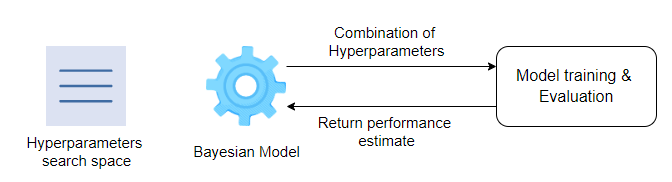

The above illustration shows how the SMBO method selects a combination of hyperparameter values.

One of the key benefits of SMBO is that it allows the algorithm to focus its evaluations on the most promising hyperparameter combinations. This differs from the grid search method or random search method learned in previous lessons. The grid or random search methods tend to evaluate every combination of hyperparameters in the search space, regardless of how promising they are likely to be.

By focusing on the most promising hyperparameters, the SMBO method can significantly reduce the number of evaluations required to find an optimal solution or the best combination of hyperparameters to produce the best resu

Benefits of SMBO : 

SMBO efficiently selects and evaluates hyperparameters for ML models by updating its probabilistic internal model based on promising outcomes, thus saving computational resources.

SMBO can also strike a balance between exploring new hyperparameters and exploiting those with potential, facilitated by its probabilistic model. This enables a comprehensive search of the hyperparameter space and avoids suboptimal outcomes.

SMBO is a powerful and successful technique for tuning hyperparameters in ML algorithms. By utilizing probabilistic models to predict the performance of different hyperparameter combinations, SMBO significantly reduces the number of evaluations required to find the optimal solution. This method has been widely adopted and appreciated by ML practitioners and data scientists due to its ability to save time and resources while simultaneously improving algorithm performance.lts.results..

## Import Important packages
First, we import important Python packages that will do the following tasks:

- Load the dataset.
- Clean the dataset.
- Process the dataset using feature engineering techniques.
- Create and train machine learning model (K-nearest neighbors) with default hyperparameters.
- Check machine learning model performance.
- Implement sequential model-based optimization method using scikit-optimize library.
- Identify combination of hyperparameters that provide the best results.




In [1]:
# import important modules
import numpy as np
import pandas as pd

# sklearn modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
# Seeding
np.random.seed(123)


## Load the dataset
We will use pandas to load the dataset from the data folder. The name of the dataset is
loan_data.csv.

In [2]:
# Load data

data_path = "loan_data.csv"

data = pd.read_csv(data_path)

Let’s see the first five rows of the dataset using the head() method from pandas.

In [3]:
# Show the top five rows of data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


As we can see, the dataset has 13 columns.

- Loan_ID: Unique loan ID
- Gender: Male/Female 
- Married: Applicant married (Y/N)
- Dependents: Number of dependents
- Education: Applicant education (Graduate/Undergraduate)
- Self_Employed: Self-employed (Y/N)
- ApplicantIncome: Applicant income
- CoapplicantIncome: Co-applicant income
- LoanAmount: Loan amount in thousands
- Loan_Amount_Term: Term of the loan in months
- Credit_History: Credit history meets guidelines
- Property_Area: Urban/Semi-Urban/Rural
- Loan_Status: Loan approved (Y/N)

The shape method from pandas will let us know the total number of rows and columns available in
the dataset.

In [5]:
# Check the shape of the data
data.shape

(614, 13)

The dataset has 614 loan data.

The pandas method called info() provides more details about each column presented in the dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The information above shows that the dataset has columns with different data types, such as object/string, integers, and float.

## Check missing values

It is important to clean the dataset by checking if it has any missing values before starting to
train the machine learning model.

The following code will provide a total of missing values for each column presented in the dataset.

In [7]:
# Check the missing values in data
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The output shows that our dataset has some missing values in different columns.

First, let’s convert some values in the Loan_Status and Dependents columns into numerical values.

In [8]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [9]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
# Replace with numerical values
data['Dependents'].replace('3+', 3,inplace=True)
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

For columns with object data type, we use the mode() function from pandas to identify the most common value in that particular column and insert the identified value into all missing points in the column.

For columns with numerical data type(int64 or float64), we use the median() function from pandas to find the median value in that particular column and insert the identified value into all missing points in the column.

In [15]:
round(100*(data.isnull().sum()/len(data.index)),2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [16]:
# Handle missing data 
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

We drop the ID column because it is not used in the process of training a machine learning model.

In [17]:
# Drop ID column
data = data.drop('Loan_ID',axis=1)

Let's check again if all missing values in the dataset have been handled.

In [18]:
# Check missing values in data
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Finally, the dataset does not have any missing values.

## How to evaluate class distribution
Identifying the class distribution helps us to know if the dataset is balanced or not. The value_counts() method from the pandas package can evaluate the class distribution by showing the total number of each unique value in the target column.

In [19]:
# Evaluate the Loan_status column
data.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

This shows that in this dataset, the distribution in the target column is unequal. There are more 1 values (Yes) than 0 values (No).

## Split data into feature and target variables

The next step is to split data into feature and target variables.

In [20]:
#split features and target from  data
X = data.drop('Loan_Status',axis = 1)
y = data.Loan_Status.values

The target is the Loan_Status variable.

## Preprocess the features

However, before we train the machine learning model, we need to transform our features into numerical values so that the machine learning model can understand the data. In this case, we will use: 

- The **MinMaxScaler()** method from scikit-learn to scale the minimum and maximum values to be 0 and 1, respectively, for the columns with int64 and float64 data types.
- The **get_dummies()** method from pandas to convert categorical variables into indicator variables. These variables will have a value of 0 or 1. This method can automatically identify categorical variables and convert them into indicator variables with a value of 0 or 1.

In [21]:
#Scale the numerical columns with MinMaxScaler() 
X["ApplicantIncome"] = MinMaxScaler().fit_transform(X["ApplicantIncome"].values.reshape(-1,1))
X["LoanAmount"] = MinMaxScaler().fit_transform(X["LoanAmount"].values.reshape(-1,1))
X["CoapplicantIncome"] = MinMaxScaler().fit_transform(X["CoapplicantIncome"].values.reshape(-1,1))
X["Loan_Amount_Term"] = MinMaxScaler().fit_transform(X["Loan_Amount_Term"].values.reshape(-1,1))

In [22]:
#Change categorical features to numerical with get_dummies() 
X = pd.get_dummies(X)

#Convert the DataFrame to a NumPy array. 
X = X.to_numpy()

## Train a Base machine learning model

In this example,we will train the K-nearest neighbors algorithm with default hyperparameter values using the cross-validation technique to check the model performance.


In [24]:
# Create a classifier
knn_classifier = KNeighborsClassifier()

We will use the `cross_val_score()` method from scikit-learn to train and evaluate a machine learning model across numerous folds of the dataset. This cross-validation method provides a more comprehensive understanding of the model’s performance across the entire dataset than a simple train/test split.


To use `cross_val_score()` method, we need to define the following parameters:

1. `estimator`: The machine learning model object to fit the data
2. `X`: The data/features to fit the machine learning model on
3. `y`: The target variable of the model classification or regression tasks
4. `scoring`: The evaluation error metric to use
5. `cv`: The number of splits to use (example 3).


The main goal is to prevent model over-fitting and promote model generalization.


Note: The machine learning model’s performance will be evaluated using the f1_score evaluation metric. We use f1_score because we have an unequal number of classes in the Loan_Status variable.

In [25]:
# Define function to evaluate f1_score
def f1_scorer(estimator, X, y):
    y_preds = estimator.predict(X)
    f1 = f1_score(y, y_preds, average='macro')
    return round(f1, 4)


# Implement and run the cross-val-score method
score = cross_val_score(estimator=knn_classifier,
                        X=X,
                        y=y,
                        scoring=f1_scorer,
                        cv=3,
                        n_jobs=-1)

# Print the mean score
print(round(score.mean(), 4))

0.5671


The mean score of our machine learning model is 0.5671, we need to improve the model performance in order to produce better result.

## Implement the sequential model-based optimization method

Since we know how well the machine learning model works with the default hyperparameter values, we can try to improve the model’s performance using the sequential model-based optimization method to find the combination of hyperparameter values that can give an F1-score of more than 0.5671.

The K-nearest neighbors algorithm has multiple hyperparameters, as shown below:

`KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)` [source](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/neighbors/_classification.py#L24)

However, for this example, we will use the following important hyperparameters to find the right combination of their values to get an F1-score greater than 0.5671.

- `n_neighbors`: The number of neighbors to use
- `weights`: The weight function used in prediction
- `algorithm`: The algorithm used to compute the nearest neighbors
- `leaf_size`: The leaf size passed to BallTree or KDTree

To implement the sequential model-based optimization method using the scikit-optimize library, we need to define the following important parameters.

- `Estimator`: The machine learning algorithm to train with different combinations of
hyperparameter values. For our case, we use K-nearest neighbors.
- `space`: The dictionary with parameter names (string value) as keys and
distributions or lists of parameters to try (search space)
- `objective function`: The function used to evaluate a given configuration of hyperparameters
- `Optimizer`: The function that is responsible for carrying out the process of Bayesian hyperparameter optimization.

In [26]:
# Import scikit-optimize module to define the search space
from skopt.space import Integer, Real, Categorical 

# Define the parameters for the sequential model-based optimization method

#1. Param distributions (define the search space)
search_space = list()
search_space.append(Categorical(['uniform', 'distance'], name='weights'))
search_space.append(Integer(5, 30, name='n_neighbors'))
search_space.append(Integer(20, 60, name='leaf_size'))
search_space.append(Categorical(['auto', 'ball_tree', 'kd_tree','brute'], name='algorithm'))

Note: We need to read the algorithm documentation to understand the function of each
hyperparameter and the types of values we can add into the search space. For the K-nearest neighbors algorithm, we can read [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Our objective function uses cross-validation techniques to evaluate the performance of the K-nearest neighbors algorithm and finally calculate the average performance score.

In [27]:
# Import argument to handle the search space
from skopt.utils import use_named_args


#2. Define the function used to evaluate a given configuration
@use_named_args(search_space)
def objective_function(**params):
    # Configure the model with specific hyperparameters
    clf = KNeighborsClassifier(**params, n_jobs=-1)
    #Train the model
    acc = cross_val_score(clf, X, y, scoring=f1_scorer, cv=3, n_jobs=-1).mean()
    acc = round(acc,4)
    return -acc

Finally, we use Gaussian processes using the `gp_minimize()` function for the optimization process. We mainly need to add the following in the optimizer function.

- Defined objective function.
- The search space
- The possible number of calls to the function needed to minimize

In [28]:
#Import optimizer from scikit-optimize library
from skopt import gp_minimize

#Configure numpy.int attribute when using the optimization method
np.int = int

#3. Perform optimization
result = gp_minimize(
    func=objective_function,
    dimensions=search_space,
    n_calls=30,
    random_state=442,
    verbose=True,
    n_jobs=-1,
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0151
Function value obtained: -0.6533
Current minimum: -0.6533
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0411
Function value obtained: -0.6542
Current minimum: -0.6542
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0243
Function value obtained: -0.6277
Current minimum: -0.6542
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0143
Function value obtained: -0.6479
Current minimum: -0.6542
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0139
Function value obtained: -0.6367
Current minimum: -0.6542
Iteration No: 6 started. 

Note: The time it takes to run the search could range anywhere from a few minutes to hours, depending on the scope of the search space, dataset size, and the processing power of the hardware.

At the end of the optimization, we can use the following attributes to access all the results.

- `x`: The location of the minimum, which indicates the combination of hyperparameters that gave the best results
- `fun`: The function value at the minimum which indicates the best performance results

In [29]:
# Show the best combination of hyperparameters
print("best combination of hyperparameters:", result.x)

best combination of hyperparameters: ['distance', 5, 21, 'auto']


This shows that when the hyperparameters have the above values as follows:

- `weights` = 'distance'
- `n_neighbors` = 5
- `leaf_size` = 21
- `algorithm` = 'auto'

These will produce the best result based on the defined search space.

In [ ]:
# Show the best score after performing the sequential model-based optimization method
print("Best score:", abs(result.fun))

The best score is an F1-score of 0.6591 which is greater than 0.5671.

As we can see the performance of the machine learning model has increased compared to the machine learning model trained with default hyperparameters.

It is recommended to add or change more either options or values of hyperparameters on the **search_space**—number of calls in the `gp_minimize()` method—and then try to
rerun it. It may be able to provide better results than what we have found.

# Advantages of the SMBO method

Efficient use of resources: SMBO selects the most promising set of hyperparameters to evaluate the machine learning model and then updates its internal model (probabilistic model) based on the results. This results in more efficient use of computational resources because the model is not evaluated on hyperparameters that are unlikely to produce the best result.

Can handle constraints: Many ML problems have some limitations on the hyperparameters, such as a limit on the search space or a maximum number of iterations. SMBO can handle these constraints by incorporating them into its internal model and selecting values of hyperparameters that satisfy the constraints.

Provide balance between exploration and exploitation: SMBO uses a probabilistic model to balance the discovery of novel hyperparameters and the exploitation of those that show promise to produce a good performance. This makes it possible to search the hyperparameter space more thoroughly, preventing the algorithm from becoming stuck in the suboptimal region.

Automated tuning: SMBO automates the process of hyperparameter optimization. This task can be time-consuming and requires domain expertise. SMBO requires the search space for selected hyperparameters and the definition of the objective function, and then the algorithm handles th

# Disadvantages of the SMBO method

Requires a good initial set of hyperparameters: SMBO primarily relies on the initial set of hyperparameters, which might be difficult if the user (data scientist) has a limited prior understanding of the problem. If the initial combination of hyperparameters is not properly selected, SMBO can get stuck in local optima, resulting in poor performance.

May get trapped in local minima: SMBO is not guaranteed to find the global optimum of the objective function; instead, it may converge to a local minimum. This can be an issue if the local minimum is very different from the global minimum, and it could lead to the performance of the model being less than optimal.e rest.